In [6]:
import sys
import os
import numpy as np
import pandas as pd
import tweedie
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.genmod.families.links import Log
from patsy import dmatrix

sys.path.append(os.path.join(sys.path[0], ".."))

from mcglm import MCGLM, mc_id

This notebook conducts some simulations to prove the overall convergence of the library. 

##### 1 - Tweedie convergence

This section presents a simulation study which validates Tweedie regressions. It produces a outcome vector $Y$ as indepedent Tweedie realizations, with the vector $\mu$ as the mean parameters and a constant dispersion parameter $\phi$. To establish a mathematical notation, $Y_i \sim Tw_p(\mu_i, \phi)$ and $g(\mu_i) = \eta_i = x_i\beta$. Moreover, we set three parameters(regression): $\beta_0$, $\beta_1$ and $\beta_2$ defined as (2, 0.8, -1.5), and two covariates: a sequence within -1 to 1 and a categorical two-level randomly chosen. The vector $\mu$ is calculated by means of the linear operation between covariates and regression parameters. Finally, the parameter `power` is vital to emulate the distribution as some EDM - Exponential Dispersion Family; we benchmark thre values for power (1.1, 1.5, 1.9).

By some Tweedie simulations, with the aid of the package {tweedie}, we aim to validate whether the scale parameter from tweedie simulations and the scale from the model match. 

The method below helps us to craft simulation by parameters `n_sim` as number of simulations; `sample_size` as sample size; `dispersion` as the scale parameter; `power` as the power parameter. 

In [7]:
def generate_tweedie_simulation(n_sim: int, sample_size: int, dispersion: float, power: float):
    historical_scale_from_simulation = []
    for _ in range(n_sim):
        cov1 = np.arange(-1.0, 1.0, 1/(sample_size/2))  #np.random.uniform(-1, 1, SAMPLE_SIZE)
        cov2 = np.random.choice([0, 1], size=sample_size)

        beta_0 = 2
        beta_1 = 0.8
        beta_2 = -1.5

        eta = beta_0 + beta_1*cov1 + beta_2*cov2
        mu = Log().inverse(eta)

        y = tweedie.tweedie(mu=mu, p=power, phi=dispersion).rvs(sample_size)

        data = pd.DataFrame({'y': y, 'cov1': cov1, 'cov2': cov2})

        data['cov2'] = data['cov2'].astype('str')
        X = dmatrix("~ cov1 + cov2", data, return_type="dataframe")

        # Z specification
        Z = [mc_id(data)] 

        # Model fitting
        mcglm = MCGLM(endog=data['y'], exog=X, z=Z, link='log', variance='tweedie', power=power, power_fixed=True)

        mcglmresults = mcglm.fit()

        historical_scale_from_simulation.append(mcglmresults._dispersion[0]['scalelist'][0])
        
    return historical_scale_from_simulation

Simulation for power set as `1.1`.

In [14]:
simulation_1 = {'n_sim':50, 'sample_size':300, 'dispersion':1.5, 'power':1.1}
scale_simulation_1 = generate_tweedie_simulation(**simulation_1)

simulation_2 = {'n_sim':50, 'sample_size':300, 'dispersion':15, 'power':1.1}
scale_simulation_2 = generate_tweedie_simulation(**simulation_2)

simulation_3 = {'n_sim':50, 'sample_size':300, 'dispersion':40, 'power':1.1}
scale_simulation_3 = generate_tweedie_simulation(**simulation_3)

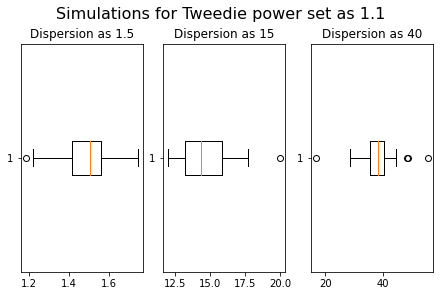

In [21]:
figure, axis = plt.subplots(1, 3,  constrained_layout=True)
  
figure.suptitle('Simulations for Tweedie power set as 1.1', fontsize=16)
# Dispersion as 1.5
axis[0].boxplot(scale_simulation_1, vert=False)
axis[0].set_title("Dispersion as 1.5")
  
# Dispersion as 15
axis[1].boxplot(scale_simulation_2, vert=False)
axis[1].set_title("Dispersion as 15")
  
# Dispersion as 40
axis[2].boxplot(scale_simulation_3, vert=False)
axis[2].set_title("Dispersion as 40")
  
# Plot
plt.show()

Simulation for power set as `1.5`.

In [23]:
simulation_1 = {'n_sim':50, 'sample_size':300, 'dispersion':2, 'power':1.5}
scale_simulation_1 = generate_tweedie_simulation(**simulation_1)

simulation_2 = {'n_sim':50, 'sample_size':300, 'dispersion':18, 'power':1.5}
scale_simulation_2 = generate_tweedie_simulation(**simulation_2)

simulation_3 = {'n_sim':50, 'sample_size':300, 'dispersion':45, 'power':1.5}
scale_simulation_3 = generate_tweedie_simulation(**simulation_3)

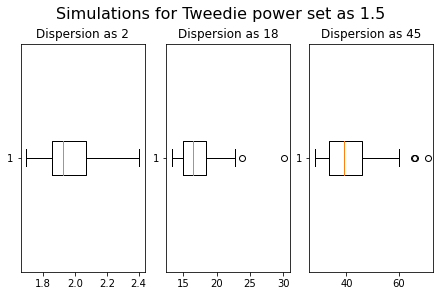

In [24]:
figure, axis = plt.subplots(1, 3,  constrained_layout=True)
  
figure.suptitle('Simulations for Tweedie power set as 1.5', fontsize=16)
# Dispersion as 2
axis[0].boxplot(scale_simulation_1, vert=False)
axis[0].set_title("Dispersion as 2")
  
# Dispersion as 18
axis[1].boxplot(scale_simulation_2, vert=False)
axis[1].set_title("Dispersion as 18")
  
# Dispersion as 45
axis[2].boxplot(scale_simulation_3, vert=False)
axis[2].set_title("Dispersion as 45")
  
# Combine all the operations and display
plt.show()

Simulation for power set as `1.9`.

In [27]:
simulation_1 = {'n_sim':50, 'sample_size':300, 'dispersion':2, 'power':1.9}
scale_simulation_1 = generate_tweedie_simulation(**simulation_1)

simulation_2 = {'n_sim':50, 'sample_size':300, 'dispersion':8, 'power':1.9}
scale_simulation_2 = generate_tweedie_simulation(**simulation_2)

simulation_3 = {'n_sim':50, 'sample_size':300, 'dispersion':15, 'power':1.9}
scale_simulation_3 = generate_tweedie_simulation(**simulation_3)

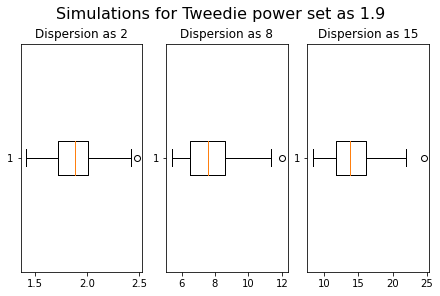

In [28]:
figure, axis = plt.subplots(1, 3,  constrained_layout=True)
  
figure.suptitle('Simulations for Tweedie power set as 1.9', fontsize=16)
# Dispersion as 2
axis[0].boxplot(scale_simulation_1, vert=False)
axis[0].set_title("Dispersion as 2")
  
# Dispersion as 8
axis[1].boxplot(scale_simulation_2, vert=False)
axis[1].set_title("Dispersion as 8")
  
# Dispersion as 15
axis[2].boxplot(scale_simulation_3, vert=False)
axis[2].set_title("Dispersion as 15")
  
# Combine all the operations and display
plt.show()